## Heart attack prediction
## Authors :
* Vargas Bravo Paola
* Illescas Coria Janet

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Simulate Dataset
#### An important observation is that, at the moment, we are only simulating this dataset. However, if we can use this RNN, we will need a REAL dataset. This is just a rough draft, so to speak.

In [6]:
num_rows = 5000

### - QT interval : Measures the duration it takes for your heart muscle to contract and subsequently recover. In other words, it reflects the time required for your heart's electrical system to send an impulse through the ventricles (the lower chambers of the heart) and then reset
### - PR Interval: Represents the time from the start of the P wave (which reflects atrial depolarization) to the start of the QRS complex (which reflects ventricular depolarization).

In [7]:
ranges = {
    'PR (ms)': (110, 210),   # PR (PR Interval in milliseconds).
    'QT (ms)': (340, 460),  # QT Interval in milliseconds
    'HR (lmp)': (50, 120),  # Heart Rate in beats per minute, BPM
    'BP (mmHg)': (80, 130)   # Blood Pressure in millimeters of mercury, mmHg
}

In [8]:
# Create random data for each column
data = {}
for column, (low, high) in ranges.items():
    data[column] = np.random.randint(low, high, size=num_rows)


df = pd.DataFrame(data)

In [9]:
df.head() # Show dataSet

,PR (ms),QT (ms),HR (lmp),BP (mmHg)
0,117,407,91,91
1,120,379,87,80
2,154,450,112,103
3,195,344,112,109
4,208,407,64,84


In [10]:
def detects_HA(pr, qt, hr, bp):
    """
    Detects whether there is a potential heart attack based on given medical data.

    This function evaluates whether the provided values for the PR interval, QT interval, heart rate (HR), and blood pressure (BP) 
    fall outside of their normal ranges. If any of these values are anomalous, it returns 1, indicating a potential heart attack.
    Otherwise, it returns 0.

    Parameters:
    pr (float): The PR interval in milliseconds, representing the time between atrial and ventricular depolarization.
    qt (float): The QT interval in milliseconds, representing the time for ventricular depolarization and repolarization.
    hr (float): The heart rate in beats per minute (BPM), indicating the number of heartbeats per minute.
    bp (float): The blood pressure in millimeters of mercury (mmHg), representing the pressure exerted by blood on vessel walls.

    Returns:
    int: 1 if any of the provided values are outside their normal ranges, indicating a potential heart attack. 
         0 if all values are within their normal ranges, suggesting no immediate indication of a heart attack.

    Normal Ranges:
    - PR Interval: 120 to 200 milliseconds
    - QT Interval: 350 to 450 milliseconds
    - Heart Rate: 40 to 120 BPM
    - Blood Pressure: 90 to 180 mmHg

    Example:
    >>> detects_HA(130, 360, 85, 95)
    0

    >>> detects_HA(210, 360, 85, 95)
    1
    """
    pr_anomalous = pr < 120 or pr > 200
    qt_anomalous = qt < 350 or qt > 450
    hr_anomalous = hr < 40 or hr > 120  
    bp_anomalous = bp < 90 or bp > 180  

    if pr_anomalous or qt_anomalous or hr_anomalous or bp_anomalous:
        return 1  
    else:
        return 0  


In [12]:
# Applies 'detects_HA' for each row in the dataset
df['HA'] = df.apply(lambda row: detects_HA(row['PR (ms)'], row['QT (ms)'], row['HR (lmp)'], row['BP (mmHg)']), axis=1)

In [13]:
df.head()

,PR (ms),QT (ms),HR (lmp),BP (mmHg),HA
0,117,407,91,91,1
1,120,379,87,80,1
2,154,450,112,103,0
3,195,344,112,109,1
4,208,407,64,84,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   PR (ms)    5000 non-null   int64
 1   QT (ms)    5000 non-null   int64
 2   HR (lmp)   5000 non-null   int64
 3   BP (mmHg)  5000 non-null   int64
 4   HA         5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


In [15]:
df.describe()

,PR (ms),QT (ms),HR (lmp),BP (mmHg),HA
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000
mean,159.431800,399.884400,84.264200,104.44880,0.44840
std,28.805494,34.502428,20.185636,14.41805,0.49738
min,110.000000,340.000000,50.000000,80.00000,0.00000
25%,135.000000,370.000000,67.000000,92.00000,0.00000
50%,159.000000,400.000000,84.000000,104.00000,0.00000
75%,184.000000,430.000000,102.000000,117.00000,1.00000
max,209.000000,459.000000,119.000000,129.00000,1.00000


In [16]:
df.corr()

,PR (ms),QT (ms),HR (lmp),BP (mmHg),HA
PR (ms),1.000000,0.019763,0.008224,-0.021763,-0.023891
QT (ms),0.019763,1.000000,-0.000909,-0.001544,-0.020747
HR (lmp),0.008224,-0.000909,1.000000,-0.003177,0.007585
BP (mmHg),-0.021763,-0.001544,-0.003177,1.000000,-0.371257
HA,-0.023891,-0.020747,0.007585,-0.371257,1.000000


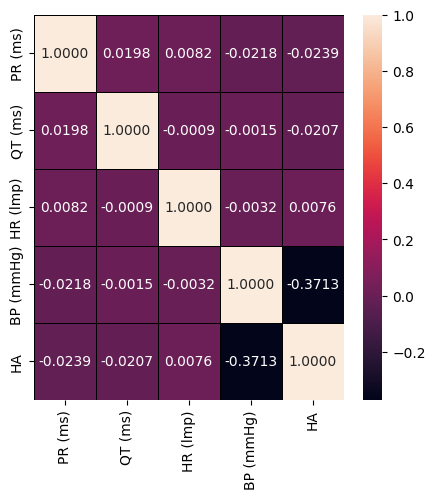

In [17]:
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(df.corr(), annot = True, linewidths=0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

In [18]:
df.columns

Index(['PR (ms)', 'QT (ms)', 'HR (lmp)', 'BP (mmHg)', 'HA'], dtype='object')

### Create RNN

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.callbacks import EarlyStopping


In [20]:
df.to_csv('HA_data.csv', index=False)

In [21]:
df = pd.read_csv('/kaggle/working/HA_data.csv')

In [23]:
X = df[['PR (ms)', 'QT (ms)', 'HR (lmp)', 'BP (mmHg)', 'HA']].values
y = df['HA'].values

In [26]:
# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [27]:
timesteps = 10
X_sequences = []
y_sequences = []

In [28]:
for i in range(len(X_scaled) - timesteps + 1):
    X_sequences.append(X_scaled[i:i + timesteps])
    y_sequences.append(y[i + timesteps - 1])

In [29]:
X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

In [33]:
model = Sequential()
model.add(LSTM(50, input_shape=(timesteps, X_sequences.shape[2]), return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5,         
    restore_best_weights=True 
)

In [48]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9981 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 3.9590e-04
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 3.3075e-04 - val_accuracy: 1.0000 - val_loss: 2.3221e-04
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 2.0930e-04 - val_accuracy: 1.0000 - val_loss: 1.6629e-04
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 1.5426e-04 - val_accuracy: 1.0000 - val_loss: 1.3021e-04
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 1.2286e-04 - val_accuracy: 1.0000 - val_loss: 1.0667e-04
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 1.0260e-04 - val_accuracy: 1.0000 - val_loss: 9.2053e-05
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 8.8148e-05 - val_accuracy: 1.0000 - val_loss: 8.0936e-05
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step 

In [41]:
y_pred_prob = model.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [42]:
y_pred = (y_pred_prob > 0.5).astype(int)

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [44]:
y_true =  y_test
y_pred_flat = y_pred.flatten()

print("Accuracy:", accuracy_score(y_true, y_pred_flat))
print("Precision Score (Macro):", precision_score(y_true, y_pred_flat, average='macro'))
print("Recall Score (Macro):", recall_score(y_true, y_pred_flat, average='macro'))
print("F1 Score (Macro):", f1_score(y_true, y_pred_flat, average='macro'))

Accuracy: 1.0
Precision Score (Macro): 1.0
Recall Score (Macro): 1.0
F1 Score (Macro): 1.0


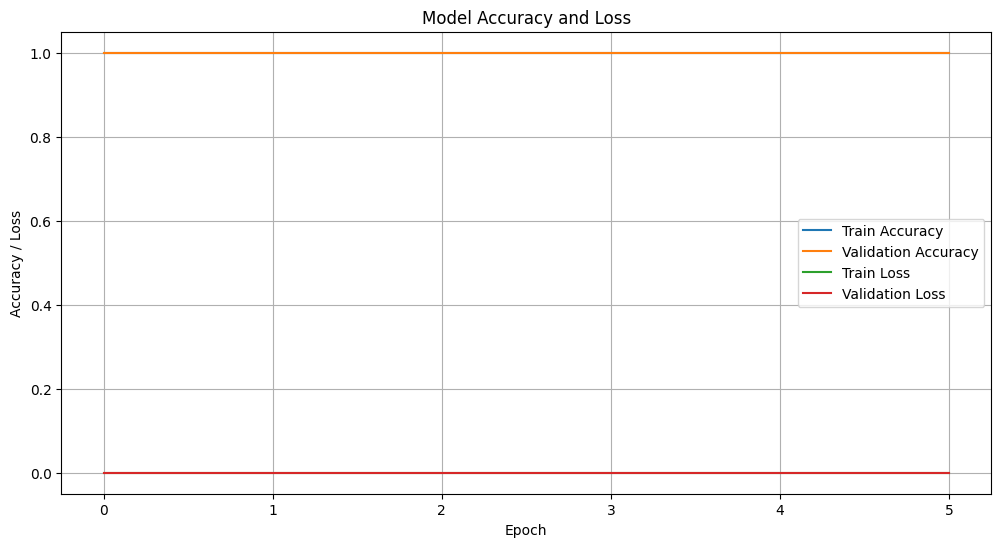

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.grid(True)
plt.show()

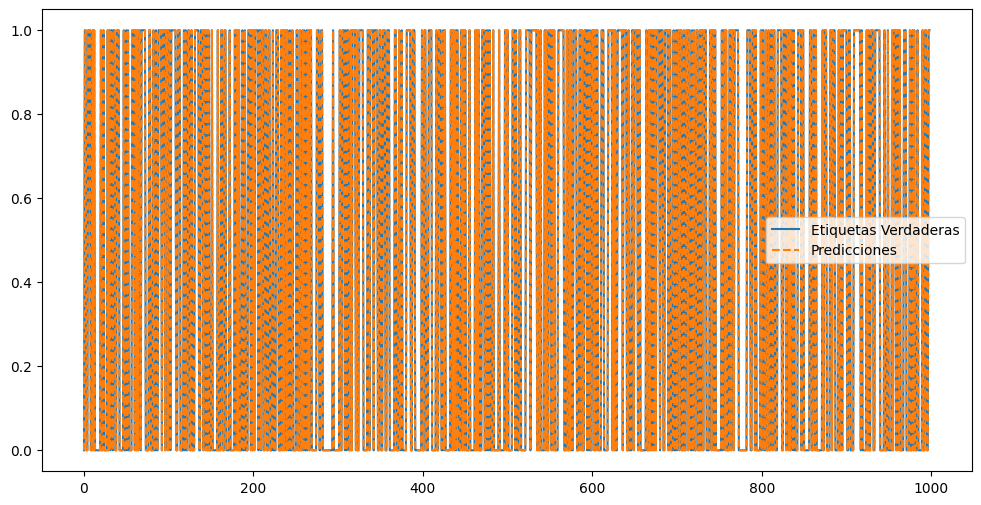

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Etiquetas Verdaderas')
plt.plot(y_pred_flat, label='Predicciones', linestyle='--')
plt.legend()
plt.show()
